In [315]:
import pandas as pd
import numpy as np

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

credit = pd.read_csv("C:\Data Analyssis\Course 2\Task2\default of credit card clients.csv", skiprows =1)
credit.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
5,6,50000,male,graduate school,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
6,7,500000,male,graduate school,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
7,8,100000,female,university,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,not default
8,9,140000,female,high school,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default
9,10,20000,male,high school,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,not default


In [316]:
#rename column
credit['Default']=credit['default payment next month']
#drop columns
credit = credit.drop(['ID','default payment next month'], axis=1)
#drop duplicates
credit = credit.drop_duplicates()
#check for nulls
#nulls = credit.isnull().sum
#nulls
credit.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
5,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
6,500000,male,graduate school,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
7,100000,female,university,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,not default
8,140000,female,high school,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default
9,20000,male,high school,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,not default


In [317]:
credit['SEX'].describe()

count      29965
unique         2
top       female
freq       18091
Name: SEX, dtype: object

In [318]:
#encode as needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(credit['SEX'])

credit['SEX'] = le.transform(credit['SEX'])

In [319]:
credit.dtypes

LIMIT_BAL     int64
SEX           int32
EDUCATION    object
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
Default      object
dtype: object

In [320]:
le.fit(credit['Default'])
credit['Default'] = le.transform(credit['Default'])


In [321]:
credit.dtypes

LIMIT_BAL     int64
SEX           int32
EDUCATION    object
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
Default       int32
dtype: object

In [322]:
#one hot-encoder
credit = pd.get_dummies(credit)

In [323]:
credit.dtypes

LIMIT_BAL                    int64
SEX                          int32
MARRIAGE                     int64
AGE                          int64
PAY_0                        int64
PAY_2                        int64
PAY_3                        int64
PAY_4                        int64
PAY_5                        int64
PAY_6                        int64
BILL_AMT1                    int64
BILL_AMT2                    int64
BILL_AMT3                    int64
BILL_AMT4                    int64
BILL_AMT5                    int64
BILL_AMT6                    int64
PAY_AMT1                     int64
PAY_AMT2                     int64
PAY_AMT3                     int64
PAY_AMT4                     int64
PAY_AMT5                     int64
PAY_AMT6                     int64
Default                      int32
EDUCATION_graduate school    uint8
EDUCATION_high school        uint8
EDUCATION_other              uint8
EDUCATION_university         uint8
dtype: object

In [324]:
credit.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,-0.289438,...,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742,0.352511,0.164025,0.015618,0.467846
std,129760.135222,0.489128,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,1.149090,...,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.477760,0.370304,0.123995,0.498973
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [325]:
#Replace -1 and -2 with 0 as those values will adversly afftect the prediction even though values has no bearing in the default

credit['PAY_0'] = credit['PAY_0'].replace(-1,0)
credit['PAY_2'] = credit['PAY_2'].replace(-1,0)
credit['PAY_3'] = credit['PAY_3'].replace(-1,0)
credit['PAY_4'] = credit['PAY_4'].replace(-1,0)
credit['PAY_5'] = credit['PAY_5'].replace(-1,0)
credit['PAY_6'] = credit['PAY_6'].replace(-1,0)

credit['PAY_0'] = credit['PAY_0'].replace(-2,0)
credit['PAY_2'] = credit['PAY_2'].replace(-2,0)
credit['PAY_3'] = credit['PAY_3'].replace(-2,0)
credit['PAY_4'] = credit['PAY_4'].replace(-2,0)
credit['PAY_5'] = credit['PAY_5'].replace(-2,0)
credit['PAY_6'] = credit['PAY_6'].replace(-2,0)



In [326]:
import pandas_profiling
#pandas_profiling.ProfileReport(credit, minimal=True)
#pandas_profiling.to_file(output_file="output_min.html")

##profile = credit.profile_report(title='Pandas Profiling Report', plot={'histogram': {'bins': 8}})
##profile.to_file(output_file="output.html")

In [327]:
credit.head(10)

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,0,1,24,2,2,0,0,0,0,...,689,0,0,0,0,0,0,0,0,1
1,120000,0,2,26,0,2,0,0,0,2,...,1000,1000,1000,0,2000,0,0,0,0,1
2,90000,0,2,34,0,0,0,0,0,0,...,1500,1000,1000,1000,5000,1,0,0,0,1
3,50000,0,1,37,0,0,0,0,0,0,...,2019,1200,1100,1069,1000,1,0,0,0,1
4,50000,1,1,57,0,0,0,0,0,0,...,36681,10000,9000,689,679,1,0,0,0,1
5,50000,1,2,37,0,0,0,0,0,0,...,1815,657,1000,1000,800,1,1,0,0,0
6,500000,1,2,29,0,0,0,0,0,0,...,40000,38000,20239,13750,13770,1,1,0,0,0
7,100000,0,2,23,0,0,0,0,0,0,...,601,0,581,1687,1542,1,0,0,0,1
8,140000,0,1,28,0,0,2,0,0,0,...,0,432,1000,1000,1000,1,0,1,0,0
9,20000,1,2,35,0,0,0,0,0,0,...,0,0,13007,1122,0,1,0,1,0,0


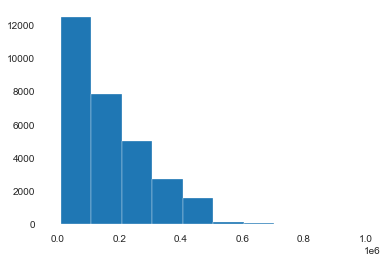

In [328]:
plt.hist(credit['LIMIT_BAL'])
plt.show();
%matplotlib inline

(array([2.3257e+04, 6.5020e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

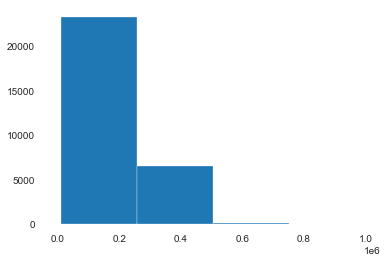

In [329]:
plt.hist(credit['LIMIT_BAL'], bins=4)

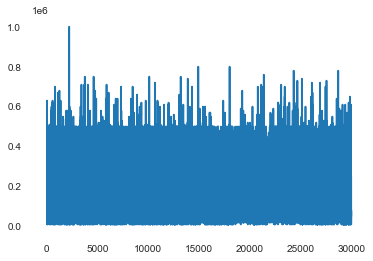

In [330]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

In [331]:
corrMat = credit.corr()
print(corrMat)

                           LIMIT_BAL       SEX  MARRIAGE       AGE     PAY_0  \
LIMIT_BAL                   1.000000 -0.025015 -0.108081  0.144643 -0.170975   
SEX                        -0.025015  1.000000  0.031372  0.091057  0.034612   
MARRIAGE                   -0.108081  0.031372  1.000000 -0.413901 -0.011770   
AGE                         0.144643  0.091057 -0.413901  1.000000 -0.001401   
PAY_0                      -0.170975  0.034612 -0.011770 -0.001401  1.000000   
PAY_2                      -0.197039  0.044685 -0.010001 -0.008783  0.698771   
PAY_3                      -0.191185  0.041064  0.000565 -0.014171  0.517209   
PAY_4                      -0.180492  0.039565 -0.004201 -0.007167  0.460391   
PAY_5                      -0.169903  0.038349 -0.002941 -0.013141  0.424593   
PAY_6                      -0.167674  0.031869  0.001885 -0.016816  0.373883   
BILL_AMT1                   0.285877  0.033675 -0.023505  0.056092 -0.000499   
BILL_AMT2                   0.278753  0.

In [332]:
credit.shape

(29965, 27)

In [333]:
print(credit.columns.tolist())

['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default', 'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university']


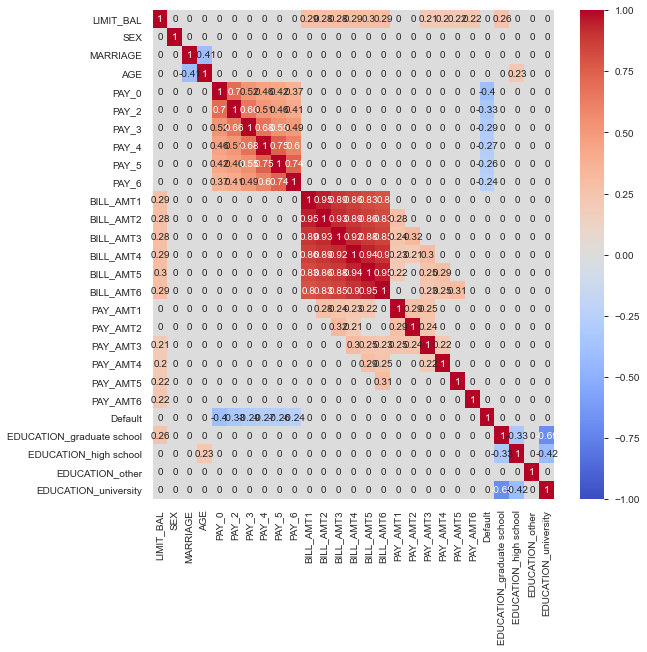

In [334]:
subjective_corr = credit.corr()
subjective_corr[np.abs(subjective_corr)<.2] = 0
plt.figure(figsize=(9,9))
sns.heatmap(subjective_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

In [335]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university'],
      dtype='object')

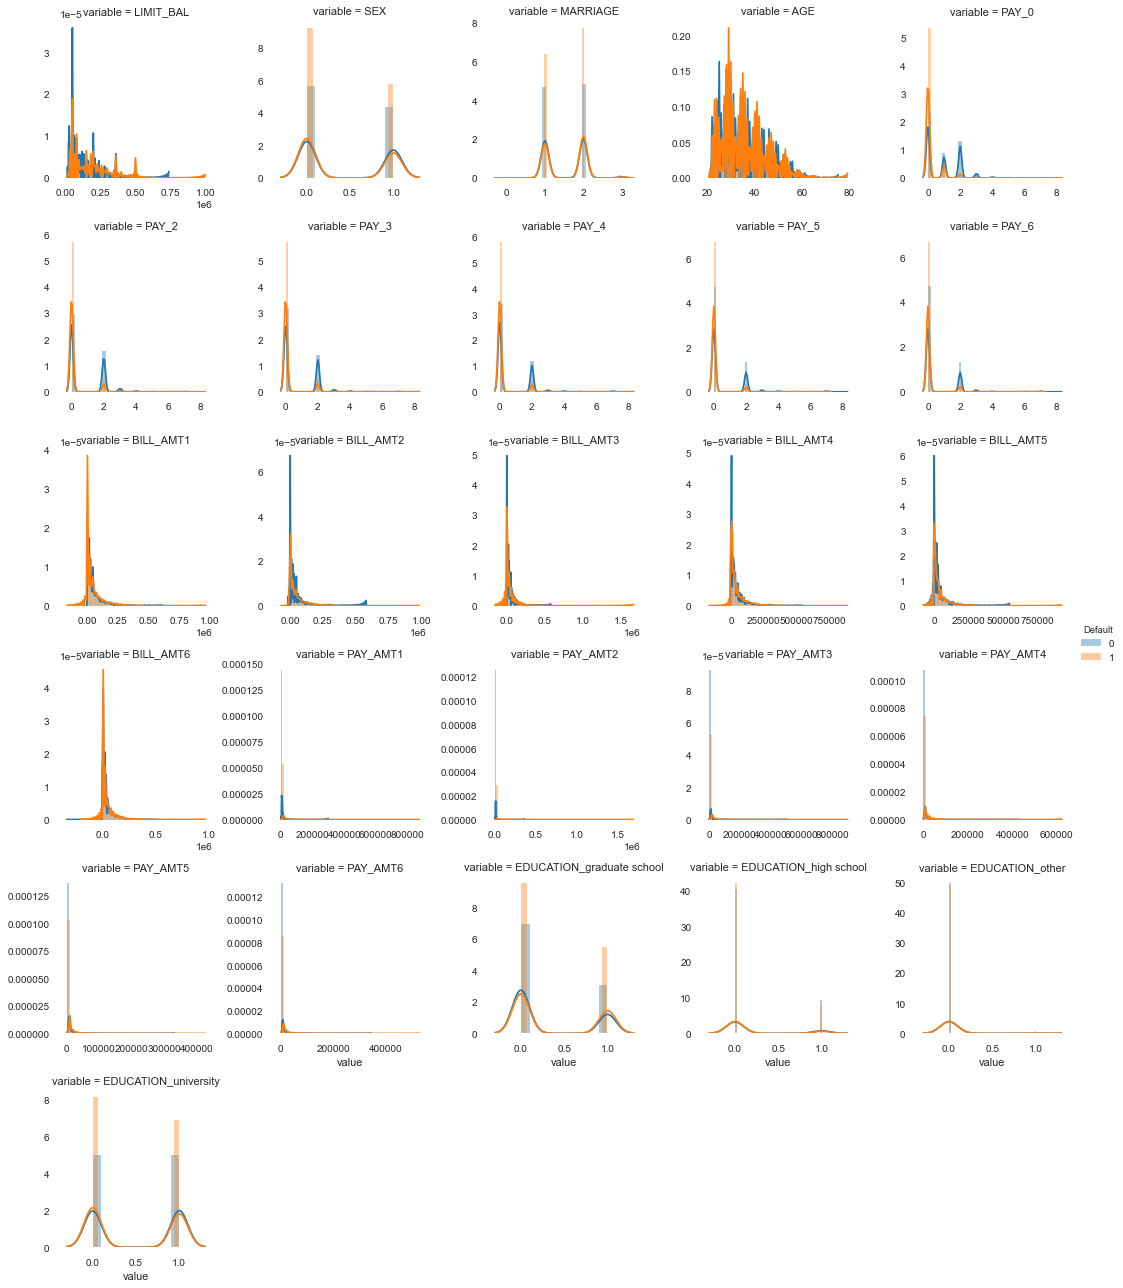

In [336]:
output = 'Default'
cols = [ f for f in credit.columns if credit.dtypes[ f ] != "object"]
#cols.remove( "ID")
cols.remove( output )


f = pd.melt( credit, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True, kde_kws={'bw':0.1}).add_legend()

In [337]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
credit['LIMIT_BAL'] = pd.qcut(credit['LIMIT_BAL'], 5 , labels = bin_labels_5)
Default =  credit['LIMIT_BAL'] [credit['Default']==0].value_counts()
TotalC = credit['LIMIT_BAL'].value_counts()
TotalC/Default*100


Bronze      314.596146
Silver      387.218650
Gold        503.209877
Platinum    592.771084
Diamond     726.373626
Name: LIMIT_BAL, dtype: float64

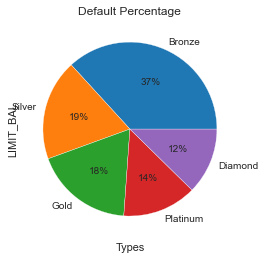

In [343]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle, islice
plt.xlabel('Types')
plt.ylabel('Percentage')

groupby_default =  credit['LIMIT_BAL'] [credit['Default']==0].value_counts()
#groupby_reg.plot(x='Region',y='amount',kind='pie',autopct='%1.0f%%', title='Amount Spent By Each Regions', legend=True)

groupby_default.plot(x='Region',y='amount',kind='pie',autopct='%1.0f%%', title='Default Percentage')
plt.show()

In [290]:
#pd.set_option('display.max_columns',25)

In [235]:
#features
X=credit.iloc[:,1:25]
X.head()



,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,EDUCATION_graduate school,EDUCATION_high school
0,0,1,24,2,2,0,0,0,0,3913,...,0,0,689,0,0,0,0,0,0,0
1,0,2,26,0,2,0,0,0,2,2682,...,3261,0,1000,1000,1000,0,2000,0,0,0
2,0,2,34,0,0,0,0,0,0,29239,...,15549,1518,1500,1000,1000,1000,5000,1,0,0
3,0,1,37,0,0,0,0,0,0,46990,...,29547,2000,2019,1200,1100,1069,1000,1,0,0
4,1,1,57,0,0,0,0,0,0,8617,...,19131,2000,36681,10000,9000,689,679,1,0,0


In [236]:
y=credit['LIMIT_BAL']
y.head()

0    Bronze
1      Gold
2    Silver
3    Bronze
4    Bronze
Name: LIMIT_BAL, dtype: category
Categories (5, object): [Bronze < Silver < Gold < Platinum < Diamond]

In [237]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [238]:
#classification
results = []
names = []
for name, modelage in algos_Class:
    result = cross_val_score(modelage, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [239]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5317871484824738
Decision Tree Classifier 0.4315366680414268


In [240]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=123)

In [241]:
#limitp=DecisionTreeClassifier()
limitp1=RandomForestClassifier()

In [242]:
modellimitp1 = limitp1.fit(X_train,y_train)

In [243]:
predlimitpay= modellimitp1.predict(X_test)

In [244]:
print("Accuracy Score:",accuracy_score(y_test, predlimitpay))

Accuracy Score: 0.5333689268553123


In [344]:
clreport = classification_report(y_test,predlimitpay)

In [345]:
print(classification_report(y_test,predlimitpay))

              precision    recall  f1-score   support

      Bronze       0.66      0.85      0.75      1915
     Diamond       0.49      0.55      0.52      1464
        Gold       0.46      0.41      0.43      1552
    Platinum       0.41      0.30      0.34      1363
      Silver       0.52      0.43      0.47      1198

    accuracy                           0.53      7492
   macro avg       0.51      0.51      0.50      7492
weighted avg       0.52      0.53      0.52      7492



In [246]:
print(cross_val_score(modellimitp1, X, y, cv=3))

[0.53188507 0.53674409 0.52973568]
